# K means

## <span style="color:blue">Alunos</span>

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>


___________________________________________________________________
## Exercício 1
a) Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”

In [1]:
#imports
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from tqdm import tqdm
import numpy as np
import time
%matplotlib inline


In [2]:
path = 'Data/data2.mat'
data2_mat = scipy.io.loadmat(path)
X2 = data2_mat['X']
random_state = 120

data2_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

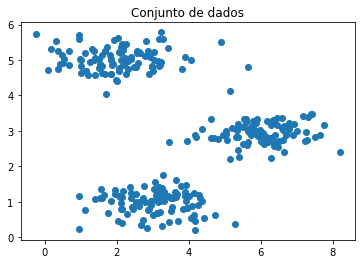

In [3]:
x = [x[0] for x in X2]
y = [x[1] for x in X2]

plt.scatter(x=x, y=y)
plt.title('Conjunto de dados')
plt.show()
plt.close()

In [4]:
def plot_kmeans(X, kmeans, center_by_iter = 0):
    arr_labels = kmeans.predict(X)
    x = [x[0] for x in X]
    y = [x[1] for x in X]
    labels = np.unique(arr_labels)
    
    cluster_centers = kmeans.cluster_centers_

    for i in labels:
        plt.scatter(np.array(x)[arr_labels == i], np.array(y)[arr_labels == i], label=i, marker='.')

    if(center_by_iter == 0):
        for cluster_center in cluster_centers:
            plt.scatter(cluster_center[0], cluster_center[1], color='black', marker='x')
    else:
        for i in range(kmeans.n_clusters):
            center = [c[i] for c in centers_by_iter]
            print(' -> '.join([str(c) for c in center]))
            center_x = [x[0] for x in center]
            center_y = [x[1] for x in center]
            plt.plot(center_x,center_y, color='black')
            plt.scatter(center_x, center_y, color='black', marker='x') 
    
    plt.title(f'Kmeans algoritmo para {kmeans.n_clusters} clusters - Numero de iterações {kmeans.n_iter_}')
    plt.legend()
    plt.show()
    plt.close()
    

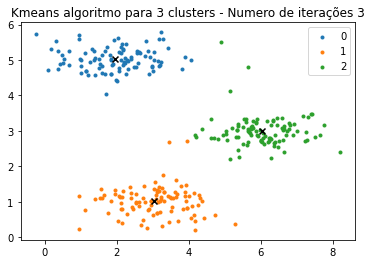

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 120,
 'tol': 0.0001,
 'verbose': 0}

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state )

kmeans.fit(X2)
plot_kmeans(X2, kmeans)
kmeans.get_params()


<span style="color:green">---------------------------------------------------------------------------------------------</span>
#### <span style="color:green">ANÁLISE</span>

<p>

   Nesse exercício, foi feito o agrupamento dos dados em 3 conjuntos utilizando o algorítmo do K-Means. Os dados vieram de um dataset do MatLAB e foram lidos utilizando a biblioteca ```scipy.io```.
   
   O K-Means é um algoritmo não supervisionado (não trabalha com dados rotulados) de clusterização (agrupamento) disponível na biblioteca Scikit-Learn. Este algorítmo irá avaliar e agrupar os dados de acordo com suas características. O processo para o agrupamento de dados se baseia no conceito de similidaridade, ou seja, a ideia principal é encontrar itens semelhantes de acordo com seus atributos.

   Inicialmente é definido o 'K' que é o número de clusters (no caso do problema é 3). Depois é definido, aleatoriamente, um centroide para cada cluster. Para isso foi utilizado o método de inicialização ```k-means++++``` que seleciona centros de clusters de forma inteligente para acelerar a convergência.

   O próximo passo é calcular, de cada ponto, o centróide de menor distância, estes pontos pertencerão a este centróde. Após isso, deve-se reposicionar o centróide na posição média de todos os pontos do cluster. Estes ultimos passos serão repetidos, iterativamente, até atingir a convergência.

   Análisando o gráfico acima, percebe-se que houve uma rápida convergência (com 3 iterações). Isso também pode ser notado abaixo, onde temos o caminho feito pelos centróides por iteração. Nele pode-se observar que já na segunda iteração já estava próximo do centróide de convergência. Isso se deve a escolha do método de inicialização e pelos dados serem facilmente dividos em 3 conjuntos, visualmente.
</p>

fonte: https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

<span style="color:green">---------------------------------------------------------------------------------------------</span>

[6.01315208 2.99775012] -> [1.95399466 5.02557006] -> [1.95399466 5.02557006] -> [1.95399466 5.02557006]
[1.95399466 5.02557006] -> [3.04367119 1.01541041] -> [3.04367119 1.01541041] -> [3.04367119 1.01541041]
[3.03458254 0.9985308 ] -> [6.03366736 3.00052511] -> [6.03366736 3.00052511] -> [6.03366736 3.00052511]


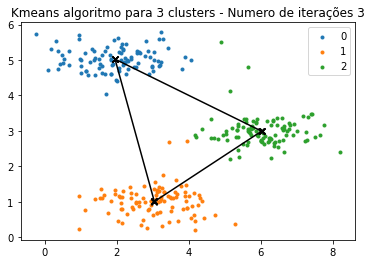

In [6]:
n_iter = 1
centers_by_iter = []
while True:
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state, max_iter = n_iter)
    kmeans.fit(X2)
    centers_by_iter.append(kmeans.cluster_centers_)
    if(kmeans.n_iter_ < n_iter):
        break
    n_iter += 1

plot_kmeans(X2, kmeans, centers_by_iter)
    


b) Agora ajuste o algoritmo K-Means para diferentes números de clusters (1 a 20).


In [7]:
def kmeans_cluster(n_cluster, X):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++')
    kmeans.fit(X)
    return kmeans

<span style="color:green">---------------------------------------------------------------------------------------------</span>

<p>
   Esta função irá receber o número de cluster pedidos e o conjunto de dados, e fará o ajuste, usando o algoritmo do K-Means, para obter os clusters.
</p>

<span style="color:green">---------------------------------------------------------------------------------------------</span>


c) Para cada modelo, armazene o número de clusters e o valor da inércia(custo).


  0%|          | 0/20 [00:00<?, ?it/s]

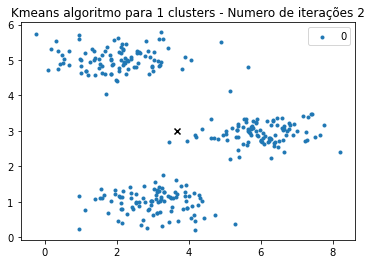

  5%|▌         | 1/20 [00:01<00:33,  1.75s/it]

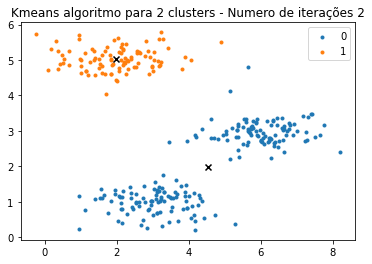

 10%|█         | 2/20 [00:02<00:23,  1.33s/it]

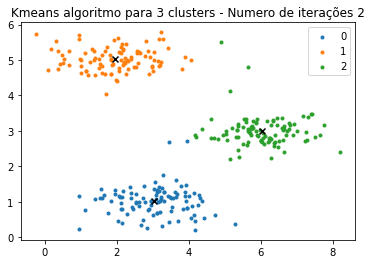

 15%|█▌        | 3/20 [00:02<00:17,  1.04s/it]

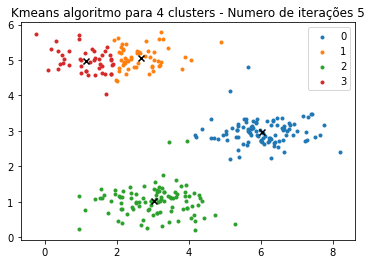

 20%|██        | 4/20 [00:02<00:13,  1.17it/s]

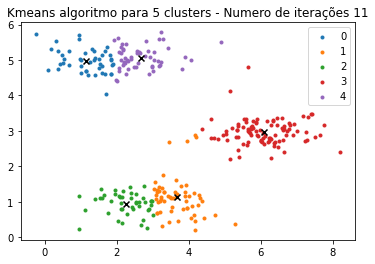

 25%|██▌       | 5/20 [00:03<00:11,  1.29it/s]

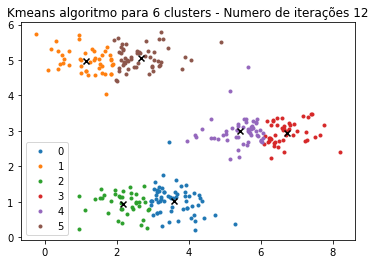

 30%|███       | 6/20 [00:03<00:09,  1.47it/s]

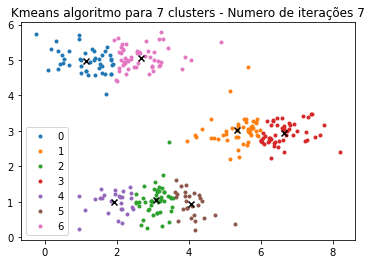

 35%|███▌      | 7/20 [00:04<00:08,  1.57it/s]

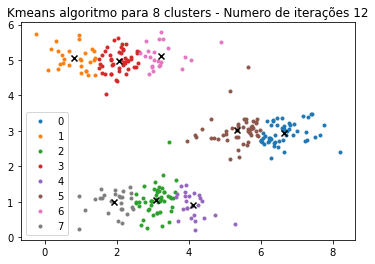

 40%|████      | 8/20 [00:05<00:07,  1.64it/s]

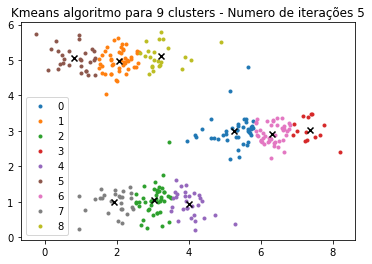

 45%|████▌     | 9/20 [00:05<00:07,  1.53it/s]

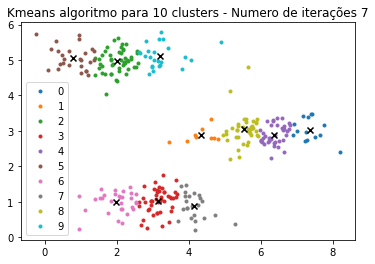

 50%|█████     | 10/20 [00:06<00:06,  1.61it/s]

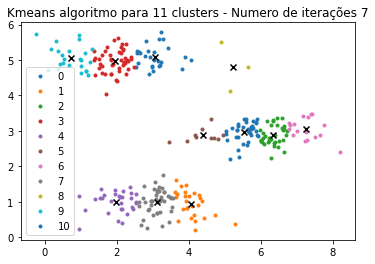

 55%|█████▌    | 11/20 [00:07<00:06,  1.47it/s]

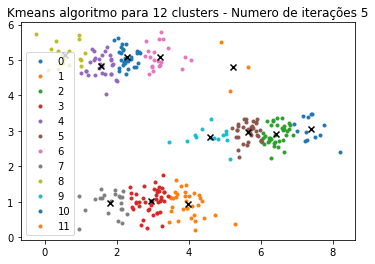

 60%|██████    | 12/20 [00:07<00:05,  1.50it/s]

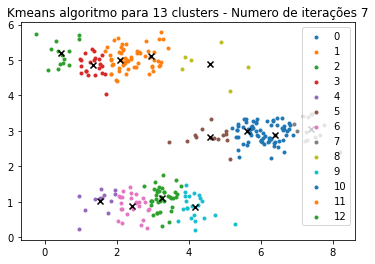

 65%|██████▌   | 13/20 [00:08<00:04,  1.48it/s]

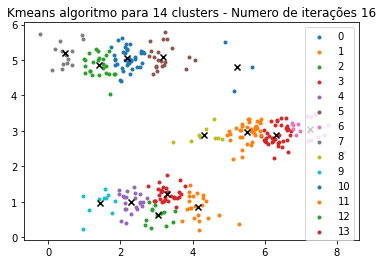

 70%|███████   | 14/20 [00:09<00:04,  1.48it/s]

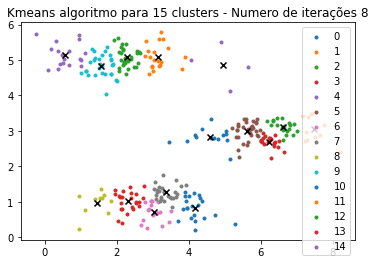

 75%|███████▌  | 15/20 [00:09<00:03,  1.44it/s]

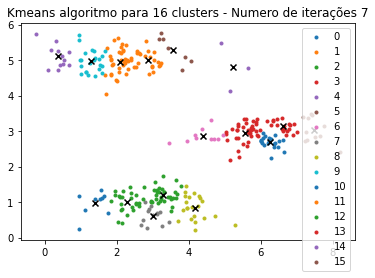

 80%|████████  | 16/20 [00:10<00:02,  1.39it/s]

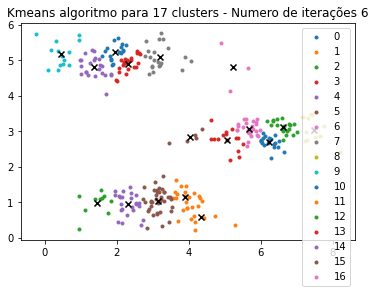

 85%|████████▌ | 17/20 [00:11<00:02,  1.35it/s]

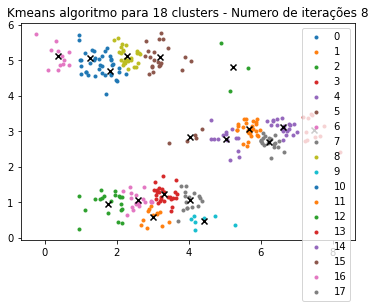

 90%|█████████ | 18/20 [00:12<00:01,  1.29it/s]

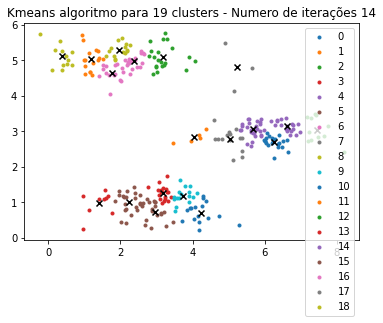

 95%|█████████▌| 19/20 [00:13<00:00,  1.26it/s]

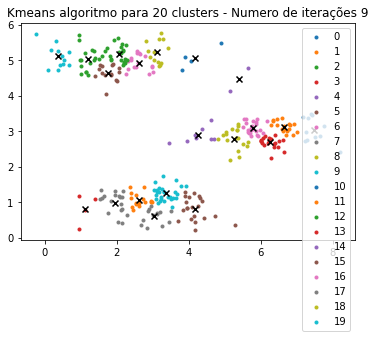

100%|██████████| 20/20 [00:13<00:00,  1.43it/s]


In [8]:
inertias = []
n_clusters = []
for i in tqdm(range(1,21)):
    kmeans = kmeans_cluster(i, X2)
    inertias.append(kmeans.inertia_)
    n_clusters.append(kmeans.n_clusters)
    plot_kmeans(X2, kmeans)


In [9]:
inertias

[1957.6547206251664,
 913.3192714747096,
 266.65851965491936,
 211.4822252014237,
 161.33863093797007,
 120.76337561233976,
 107.0852738331321,
 88.70603590774851,
 78.08626544243913,
 68.69859736378345,
 62.16091759371339,
 56.335157231203866,
 51.090850653455604,
 47.356961970772694,
 44.439409629249106,
 42.34578275365865,
 40.09006095757739,
 37.61178590855042,
 34.78225480020127,
 33.954979773515724]

<span style="color:green">---------------------------------------------------------------------------------------------</span>
<p>
   Aqui podemos perceber que houve um aumento da quantidade de iterações para convergir para diferentes números de clusters, se comparado com K = 3.
</p>

<span style="color:green">---------------------------------------------------------------------------------------------</span>

d) Plote a Inércia (custo) versus Nº de clusters. Parece haver um número ideal de cluster (método do cotovelo - elbow?

<ipython-input-10-396a0f4cf24b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


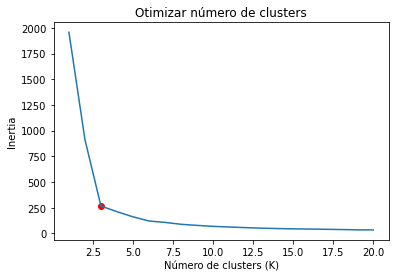

In [10]:
plt.plot(n_clusters, inertias)
plt.scatter(3,inertias[2], color='red', label=f"Ponto de inflexão (3, {inertias[2]})")
plt.title('Otimizar número de clusters')
ax = plt.axes()
ax.set_xlabel('Número de clusters (K)')
ax.set_ylabel('Inertia')
plt.show()
plt.close()

<span style="color:green">---------------------------------------------------------------------------------------------</span>
#### <span style="color:green">ANÁLISE</span>
   
<p>
A Inertia é uma métrica que mede o quão bem um conjunto de dados foi agrupado pelo algoritmo do K-Means. Ela é calculada a partir da soma das distâncias ao quadrado de cada ponto até o centro do seu cluster. Um bom modelo possui uma baixa Inertia e um baixo número de clusters (K).

Para encontrar o valor ideal de K pode-se aplicar o método Elbow. Este método consiste em variar o valor de K e medir a inertia para cada um desses valores. Assim é montado um gráfico de K x Inertia e é escolhido o ponto de inflexão ("o cotovelo") em que o grau de diminuição da Inertia fica menor.

No gráfico acima, esse procedimento foi feito. Como podemos observar, o ponto de inflexão, destacado em vermelho, possui um valor de K = 3. Neste sentido, para o conjunto de dados estudos, 3 é o número ideal de clusters para agrupar os dados com coesão.
</p>

fonte: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

<span style="color:green">---------------------------------------------------------------------------------------------</span>

e) Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical Agglomerative Clustering) com três clusters (escolha e teste diferentes tipos de linkage).

In [11]:
def aggCluster(X, n_clusters, affinity, linkage):    
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    y = agg.fit_predict(X)
    return (y,agg)

In [12]:
def plot_aggCluster(X,  y_label, agg, link):
    x = [x[0] for x in X]
    y = [x[1] for x in X]
    
    plt.scatter(x,y, c=y_label,  marker='.') 
    
    plt.title(f'Cluster aglomerativo hierarquico algoritmo para {agg.n_clusters} clusters - {link} linkage')
    plt.show()
    plt.close()

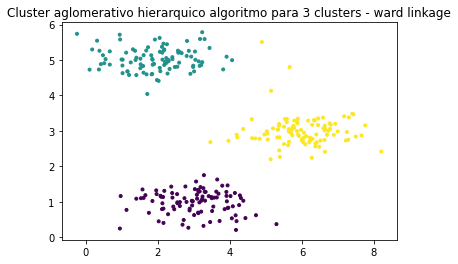

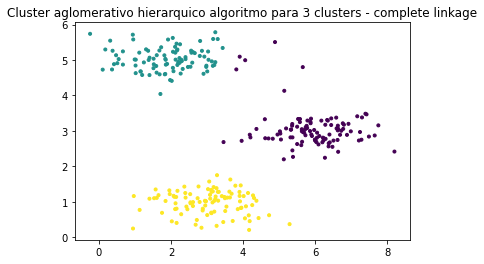

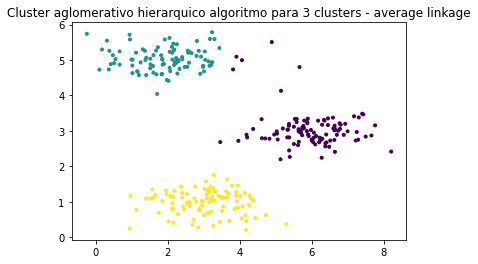

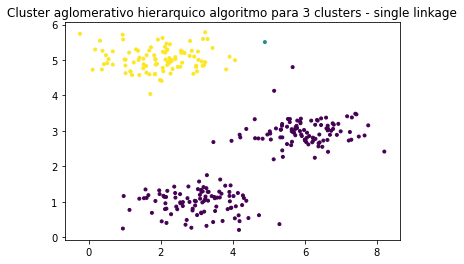

In [13]:
linkages = ["ward", "complete", "average", "single"]
for link in linkages:
    y_label, agg = aggCluster(X2, 3, 'euclidean', link)
    plot_aggCluster(X2, y_label, agg, link)

<span style="color:green">---------------------------------------------------------------------------------------------</span>
#### <span style="color:green">ANÁLISE</span>
   
<p>
O Agrupamento Aglomerativo Hierárquico é um dos métodos de clustering mais populares. Este método busca construir uma hierarquia de agrupamentos, ou seja, uma estrutura tipo uma árvore baseada na hierarquia. O agrupamento será feito de baixo para cima, inicialmente cada dado será considerado um cluster e, em seguida, aglomera sucessivamente pares de clusters até que todos os clusters tenham sido mesclados em um único cluster que contém todos os dados. 

Sobre este método, deve ser escolhido qual critério para ligar os cluster deve ser utilizado (linkage). O linkage determina qual distância utilizar entre os conjuntos de dados. O metódo irá juntar os pares de cluster que minimizam este critério. Existem 4 métodos de ligação:
- ward linkage: junta os cluster com base na melhor inertia
- average linkage: usa a distância média entre os pontos dos clusters
- complete linkage: usa a maior distância entre pontos de dois clusters e escolhe o mínimo.
- simple linkage: usa a distância mínima entre pares entre clusters
  
No conjunto de dados do exercício, foi usado a função ```AgglomerativeClustering``` para também agrupar em 3 clusters. Neste caso, foi variado a forma de ligação e os gráficos foram apresentados acima. Como pode-se notar, para os três prmeiro métodos a separação de conjunto foi bem próxima, enquanto para o último (simple linkage) um dos conjuntos teve apenas um dado.
</p>

fonte: https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/

<span style="color:green">---------------------------------------------------------------------------------------------</span>

f) Compare os resultados com os obtidos pelo k-means

Tempo de execução do K-means: 0.04503512382507324
Gráfico gerado pelo K-means algoritimo


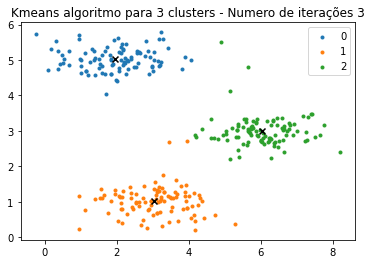

Inertia  266.65851965491936

Gráficos gerados pelo Algoritmo do clustering Aglomerativo Hierárquico
Tempo de execução do Aglomerativo Hierárquico - ward linkage: 0.009431123733520508


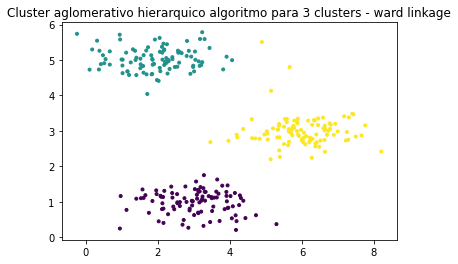

Tempo de execução do Aglomerativo Hierárquico - complete linkage: 0.0


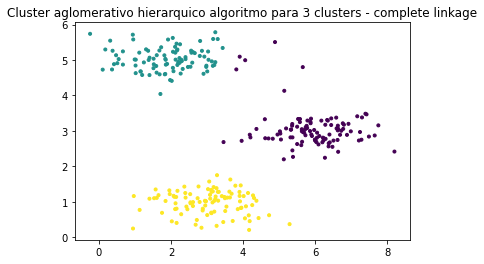

Tempo de execução do Aglomerativo Hierárquico - average linkage: 0.0


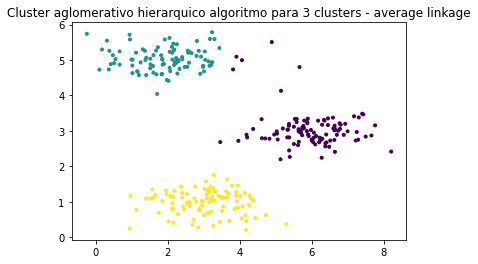

Tempo de execução do Aglomerativo Hierárquico - single linkage: 0.0


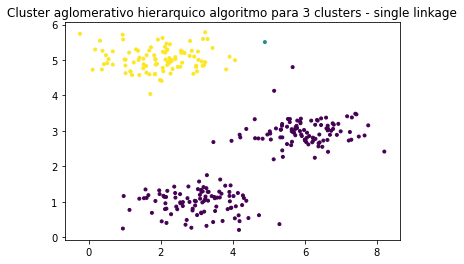

In [14]:
inicio = time.time()
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state )
kmeans.fit(X2)
fim = time.time()
print(f'Tempo de execução do K-means: {fim-inicio}')
print('Gráfico gerado pelo K-means algoritimo')
plot_kmeans(X2, kmeans)
print('Inertia ',kmeans.inertia_)

print('')

print('Gráficos gerados pelo Algoritmo do clustering Aglomerativo Hierárquico')
for link in linkages:
    inicio = time.time()
    y_label, agg = aggCluster(X2, 3, 'euclidean', link)
    fim = time.time()
    print(f'Tempo de execução do Aglomerativo Hierárquico - {link} linkage: {fim-inicio}')
    plot_aggCluster(X2, y_label, agg, link)


<span style="color:green">---------------------------------------------------------------------------------------------</span>
#### <span style="color:green">ANÁLISE</span>
   
<p>
Comparando os resultados dos dois algoritmos, tivemos gráficos bem próximos entre o K-means e o AgglomerativeClustering para diferentes linkage, com exceção do simple linkage. A função do K-means presente no Scikit Learn apresenta mais valores para análise (número de iterações totais, inertia), quando comparamos com a AgglomerativeClustering, o que dificulta a comparação. 

Em relação ao tempo de execução, o AgglomerativeClustering se apresentou bem mais rápido que o K-means. Entretanto ele fica mais custoso a medida que o conjunto de dados aumenta, visto que mais operações devem ser realizadas.
</p>

fonte: https://www.globaltechcouncil.org/clustering/k-means-clustering-vs-hierarchical-clustering/
<span style="color:green">---------------------------------------------------------------------------------------------</span>

g) Visualize o dendrograma produzido pelo método de agrupamento aglomerativo Dica: O SciPy tem um módulo chamado cluster.hierarchy que contém as funções de linkage e dendrogram necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante.


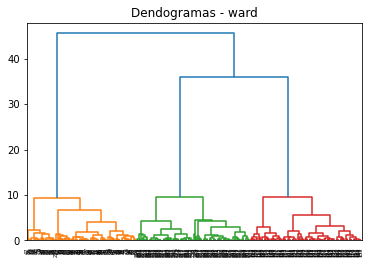

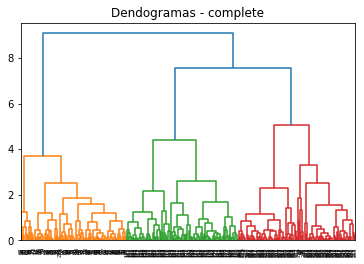

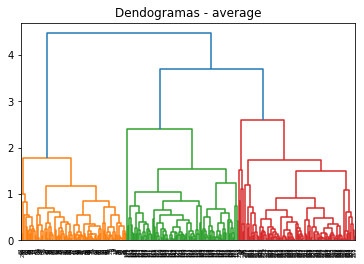

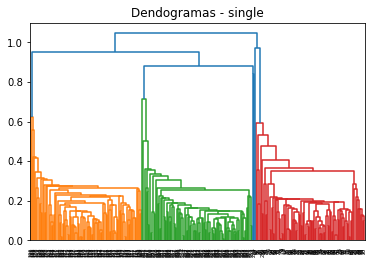

In [15]:
for link in linkages:
    plt.title(f'Dendogramas - {link}')
    dend = shc.dendrogram(shc.linkage(X2, method=link))
    plt.show()
    plt.close()

<span style="color:green">---------------------------------------------------------------------------------------------</span>

<p>
O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de daddos em cada passo e em seus níveis de distância entre os clusters. A distância entre os cluster é medida ao longo do seu eixo vertical. Eles são uma representação diagramática da relação hierárquica entre os pontos de dados. A partir dele é possível determinar qual o número correto de clusters a serem usados, além de facilitar na interpretação do resultado.
</p>

fonte: https://towardsdatascience.com/agglomerative-clustering-and-dendrograms-explained-29fc12b85f23
<span style="color:green">---------------------------------------------------------------------------------------------</span>

___________________________________________________________________
## Exercício 2

In [16]:
#imports
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

<span style="color:green">---------------------------------------------------------------------------------------------</span>

<p>
Neste exercício queremos comprimir os pixels de uma imagem. Para isso, temos como conjunto de dados a matriz de 128x128 contendo em cada posição um pixel em formato RGB. Iremos comprimir a imagem para que ela seja composta por apenas 16 pixels diferentes. Isto será feito usando o métoddo K-means, agrupando o conjunto de dados em 16 clusters e usando o centróide de cada um desses clusters como pixel daquele conjunto.

Inicialmente, transformamos a matriz em uma única linha e mudamos a escala dos valores para ficar entre 0 e 1 ao invés de entre 0 e 255.
</p>

<span style="color:green">---------------------------------------------------------------------------------------------</span>

In [17]:
path = 'Data/bird_small.mat'
img_data = scipy.io.loadmat(path)
A = img_data['A']
A = np.reshape(A, (len(A)*len(A),3))
A

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       ...,
       [ 65,  43,  39],
       [ 58,  37,  38],
       [ 52,  39,  34]], dtype=uint8)

In [18]:
A = A/255
A

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

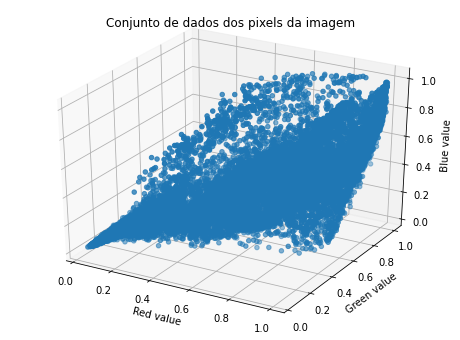

In [19]:
x = [x[0] for x in A]
y = [x[1] for x in A]
z = [x[2] for x in A]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, marker='o')
ax.set_xlabel('Red value')
ax.set_ylabel('Green value')
ax.set_zlabel('Blue value')
plt.title('Conjunto de dados dos pixels da imagem')
plt.show()
plt.close()

In [20]:
kmeans = KMeans(n_clusters=16, init='k-means++', random_state=random_state )

arr_label = kmeans.fit_predict(A)
clusters_center_colors = kmeans.cluster_centers_

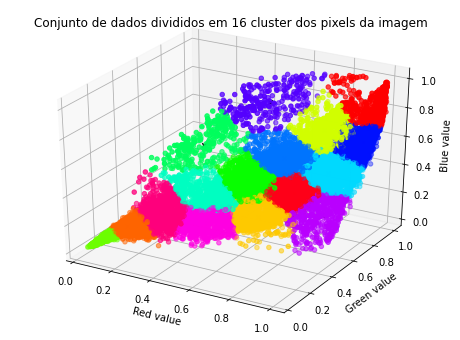

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, marker='o', c=arr_label, cmap='hsv')
for cluster in clusters_center_colors:
    ax.scatter(cluster[0], cluster[1], cluster[2], marker='x', color='black')

ax.set_xlabel('Red value')
ax.set_ylabel('Green value')
ax.set_zlabel('Blue value')
plt.title('Conjunto de dados divididos em 16 cluster dos pixels da imagem')
plt.show()
plt.close()

<span style="color:green">---------------------------------------------------------------------------------------------</span>

<p>
Ao plotarmos este conjunto de dados, cada dimensão será um dos valores do RGB (Red, Green e Blue). Após aplicarmos o K-means no conjunto de dados com K = 16, obtivemos o gráfico acima onde é possível ver a divisão em conjuntos.
</p>

<span style="color:green">---------------------------------------------------------------------------------------------</span>

In [22]:
clusterImgData = [clusters_center_colors[i] for i in arr_label]
clusterImgData = np.array(clusterImgData)
compressImgData = np.reshape(clusterImgData, (128,128,3))

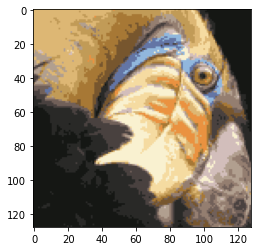

In [23]:
plt.imshow(compressImgData)
plt.show()
plt.imsave('./Bird_small_compress_image.png',arr=compressImgData)
plt.close()

<span style="color:green">---------------------------------------------------------------------------------------------</span>

<p>
Agora utilizamos os valores dos centros de cada cluster, juntamente com os rótulos que identificam a qual conjunto aquele pixel pertence, para montar a imagem comprimida. Cada valor do rótulo será substituída pelo centro correspondente, o vetor é transformado novamente em uma matriz 128x128 e a nova imagem é gerada.

O resultado foi obtido acima.
</p>

<span style="color:green">---------------------------------------------------------------------------------------------</span>